**IE 6400 FUNDAMENTALS OF DATA ANALYTICS (GROUP - 8)**

**1)** YASH HARALE

**2)** SAKSHI ARYAL

**3)** SHRUTHI KASHETTY

DATA AQUISITION :

In [2]:
#Initialzation
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

crimeData = pd.read_csv('Crime_Data_from_2020_to_Present.csv')

DATA INSPECTION :

In [2]:
#Display the first few rows of the dataset.
crimeData.head(10)

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,190326475,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
1,200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628
2,200320258,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700,3,Southwest,356,1,480,BIKE - STOLEN,...,IC,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002
3,200907217,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,IC,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387
4,220614831,08/18/2022 12:00:00 AM,08/17/2020 12:00:00 AM,1200,6,Hollywood,666,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,1900 TRANSIENT,NaN,34.0944,-118.3277
5,231808869,04/04/2023 12:00:00 AM,12/01/2020 12:00:00 AM,2300,18,Southeast,1826,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,9900 COMPTON AV,NaN,33.9467,-118.2463
6,230110144,04/04/2023 12:00:00 AM,07/03/2020 12:00:00 AM,900,1,Central,182,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,1100 S GRAND AV,NaN,34.0415,-118.2620
7,220314085,07/22/2022 12:00:00 AM,05/12/2020 12:00:00 AM,1110,3,Southwest,303,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,2500 S SYCAMORE AV,NaN,34.0335,-118.3537
8,231309864,04/28/2023 12:00:00 AM,12/09/2020 12:00:00 AM,1400,13,Newton,1375,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,1300 E 57TH ST,NaN,33.9911,-118.2521
9,211904005,12/31/2020 12:00:00 AM,12/31/2020 12:00:00 AM,1220,19,Mission,1974,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,9000 CEDROS AV,NaN,34.2336,-118.4535


In [3]:
#Check the data types of each column.
print("Datatypes of each column: ")
crimeData.dtypes

Datatypes of each column: 


DR_NO               int64
Date Rptd          object
DATE OCC           object
TIME OCC            int64
AREA                int64
AREA NAME          object
Rpt Dist No         int64
Part 1-2            int64
Crm Cd              int64
Crm Cd Desc        object
Mocodes            object
Vict Age            int64
Vict Sex           object
Vict Descent       object
Premis Cd         float64
Premis Desc        object
Weapon Used Cd    float64
Weapon Desc        object
Status             object
Status Desc        object
Crm Cd 1          float64
Crm Cd 2          float64
Crm Cd 3          float64
Crm Cd 4          float64
LOCATION           object
Cross Street       object
LAT               float64
LON               float64
dtype: object

In [4]:
#Review column names and descriptions, if available.
print("Columns: ")
for column in crimeData.columns:
    null_count = crimeData[column].isnull().sum()
    print(f"Column '{column}' has {null_count} null values.")
    
print("Description: ")    
crimeData.describe()

Columns: 
Column 'DR_NO' has 0 null values.
Column 'Date Rptd' has 0 null values.
Column 'DATE OCC' has 0 null values.
Column 'TIME OCC' has 0 null values.
Column 'AREA' has 0 null values.
Column 'AREA NAME' has 0 null values.
Column 'Rpt Dist No' has 0 null values.
Column 'Part 1-2' has 0 null values.
Column 'Crm Cd' has 0 null values.
Column 'Crm Cd Desc' has 0 null values.
Column 'Mocodes' has 145262 null values.
Column 'Vict Age' has 0 null values.
Column 'Vict Sex' has 138445 null values.
Column 'Vict Descent' has 138456 null values.
Column 'Premis Cd' has 14 null values.
Column 'Premis Desc' has 585 null values.
Column 'Weapon Used Cd' has 656471 null values.
Column 'Weapon Desc' has 656471 null values.
Column 'Status' has 1 null values.
Column 'Status Desc' has 0 null values.
Column 'Crm Cd 1' has 11 null values.
Column 'Crm Cd 2' has 913763 null values.
Column 'Crm Cd 3' has 980327 null values.
Column 'Crm Cd 4' has 982574 null values.
Column 'LOCATION' has 0 null values.
Colum

,DR_NO,TIME OCC,AREA,Rpt Dist No,Part 1-2,Crm Cd,Vict Age,Premis Cd,Weapon Used Cd,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LAT,LON
count,9.826380e+05,982638.000000,982638.000000,982638.000000,982638.000000,982638.000000,982638.000000,982624.000000,326167.000000,982627.000000,68875.000000,2311.000000,64.00000,982638.000000,982638.000000
mean,2.197437e+08,1338.945426,10.700277,1116.459887,1.404253,500.823555,29.079817,306.133008,363.840882,500.578668,958.167085,984.204673,991.21875,33.995725,-118.082225
std,1.294954e+07,651.537830,6.107808,610.893787,0.490747,206.211940,21.970094,219.053795,123.684663,206.010361,110.232109,51.485644,27.06985,1.636729,5.672940
min,8.170000e+02,1.000000,1.000000,101.000000,1.000000,110.000000,-4.000000,101.000000,101.000000,110.000000,210.000000,310.000000,821.00000,0.000000,-118.667600
25%,2.106089e+08,900.000000,5.000000,587.000000,1.000000,331.000000,0.000000,101.000000,311.000000,331.000000,998.000000,998.000000,998.00000,34.014600,-118.430500
50%,2.208146e+08,1420.000000,11.000000,1141.000000,1.000000,442.000000,30.000000,203.000000,400.000000,442.000000,998.000000,998.000000,998.00000,34.058900,-118.322500
75%,2.309153e+08,1900.000000,16.000000,1617.000000,2.000000,626.000000,44.000000,501.000000,400.000000,626.000000,998.000000,998.000000,998.00000,34.164900,-118.273900
max,2.499253e+08,2359.000000,21.000000,2199.000000,2.000000,956.000000,120.000000,976.000000,516.000000,956.000000,999.000000,999.000000,999.00000,34.334300,0.000000


DATA CLEANING :

In [5]:
#Identify and handle missing data appropriately.
print("Null Value existance: ", crimeData.isnull())
print("Total number of null value count in the dataframe: ",crimeData.isnull().sum().sum())
filledData = crimeData.fillna(value = "NA")
print("Null values filled dataframe: ", filledData)

Null Value existance:          DR_NO  Date Rptd  DATE OCC  TIME OCC   AREA  AREA NAME  Rpt Dist No  \
0       False      False     False     False  False      False        False   
1       False      False     False     False  False      False        False   
2       False      False     False     False  False      False        False   
3       False      False     False     False  False      False        False   
4       False      False     False     False  False      False        False   
...       ...        ...       ...       ...    ...        ...          ...   
982633  False      False     False     False  False      False        False   
982634  False      False     False     False  False      False        False   
982635  False      False     False     False  False      False        False   
982636  False      False     False     False  False      False        False   
982637  False      False     False     False  False      False        False   

        Part 1-2  Crm Cd  Cr

In [6]:
#Check for and remove duplicate rows.
duplicateRows = crimeData[crimeData.duplicated()]
if not duplicateRows.empty:
    print("Duplicate Rows:")
    print(duplicateRows)
else:
    print("No duplicate rows available.") 

No duplicate rows available.


In [7]:
#Convert data types if needed (e.g., dates to date format, numerical values to appropriate numeric types).
crimeData['Date Rptd'] = pd.to_datetime(crimeData['Date Rptd'], format='%m/%d/%Y', errors='coerce')
crimeData['DATE OCC'] = pd.to_datetime(crimeData['DATE OCC'], format='%m/%d/%Y', errors='coerce')
crimeData['TIME OCC'] = crimeData['TIME OCC'].fillna(0).astype(int)

print("CrimeData Datatypes: ")
print(crimeData.dtypes)

CrimeData Datatypes: 
DR_NO                      int64
Date Rptd         datetime64[ns]
DATE OCC          datetime64[ns]
TIME OCC                   int64
AREA                       int64
AREA NAME                 object
Rpt Dist No                int64
Part 1-2                   int64
Crm Cd                     int64
Crm Cd Desc               object
Mocodes                   object
Vict Age                   int64
Vict Sex                  object
Vict Descent              object
Premis Cd                float64
Premis Desc               object
Weapon Used Cd           float64
Weapon Desc               object
Status                    object
Status Desc               object
Crm Cd 1                 float64
Crm Cd 2                 float64
Crm Cd 3                 float64
Crm Cd 4                 float64
LOCATION                  object
Cross Street              object
LAT                      float64
LON                      float64
dtype: object


Original Data Shape: (982638, 28)
Data Shape after Removing Outliers: (952352, 28)


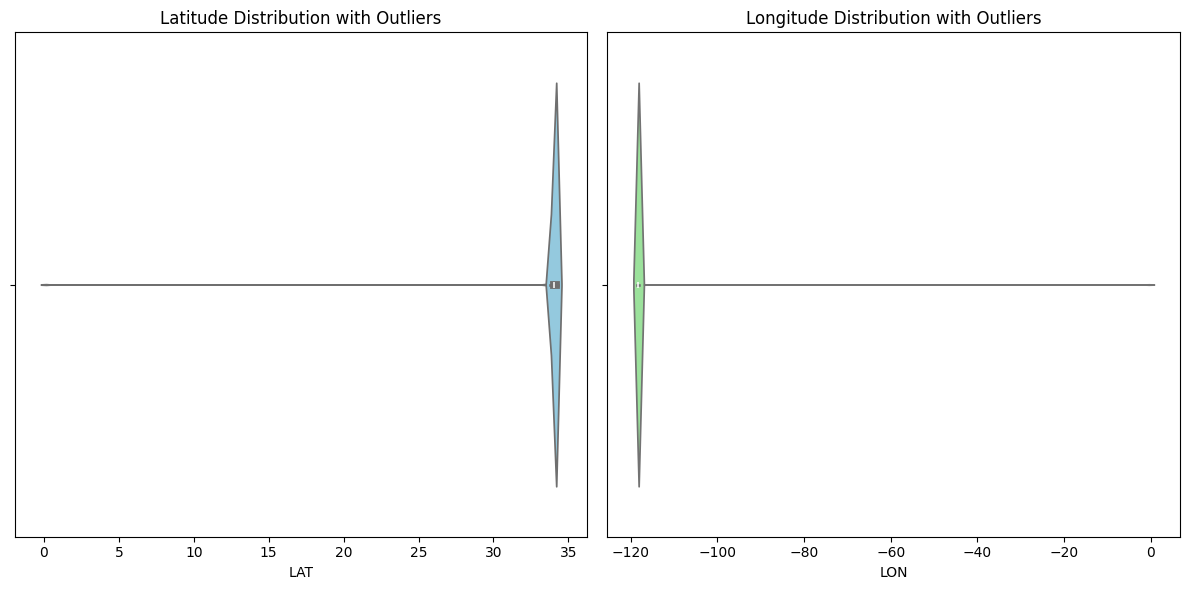

In [10]:
#Deal with outliers if relevant to your analysis.
Q1 = crimeData[['LAT', 'LON']].quantile(0.25)
Q3 = crimeData[['LAT', 'LON']].quantile(0.75)
IQR = Q3 - Q1

crime_data_no_outliers = crimeData[~((crimeData[['LAT', 'LON']] < (Q1 - 1.5 * IQR)) | 
                                     (crimeData[['LAT', 'LON']] > (Q3 + 1.5 * IQR))).any(axis=1)]

print(f"Original Data Shape: {crimeData.shape}")
print(f"Data Shape after Removing Outliers: {crime_data_no_outliers.shape}")
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.violinplot(x=crimeData['LAT'], color='skyblue')
plt.title('Latitude Distribution with Outliers')

plt.subplot(1, 2, 2)
sns.violinplot(x=crimeData['LON'], color='lightgreen')
plt.title('Longitude Distribution with Outliers')

plt.tight_layout()
plt.show()

In [13]:
#Standardize or normalize numerical data as necessary.
numeric_columns = ['Vict Age', 'TIME OCC']

scaler = StandardScaler()
numeric_columns = ['Vict Age', 'TIME OCC']

crime_data_no_outliers.loc[:, numeric_columns] = scaler.fit_transform(crime_data_no_outliers[numeric_columns])

print(crime_data_no_outliers[numeric_columns].head())

   Vict Age  TIME OCC
0 -1.326400  1.214413
1  0.816440  0.707789
2 -0.460146  0.554267
3 -0.460146  1.071637
4 -0.049815 -0.213345


In [14]:
#Encode categorical data if present.
label_encoder = LabelEncoder()

crimeData['Vict Descent Encoded'] = label_encoder.fit_transform(crimeData['Vict Descent'])

print(crimeData[['Vict Descent', 'Vict Descent Encoded']].head())

  Vict Descent  Vict Descent Encoded
0            O                    12
1            O                    12
2            X                    18
3            O                    12
4            H                     7


EXPLORATORY DATA ANALYSIS (EDA) :

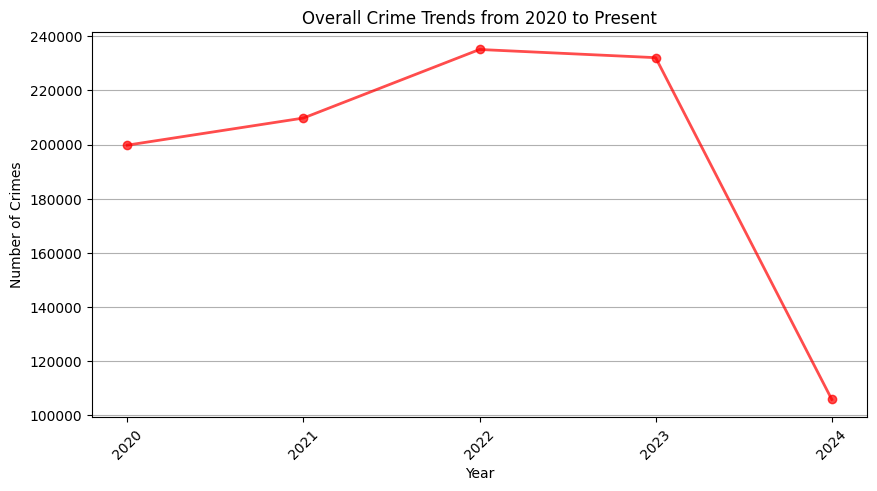

In [19]:
#Visualize overall crime trends from 2020 to the present year.
date_format = "%Y-%m-%d"

crimeData['DATE OCC'] = pd.to_datetime(crimeData['DATE OCC'], format=date_format, errors='coerce')

crimeData = crimeData[crimeData['DATE OCC'].dt.year >= 2020]

crimeData['year'] = crimeData['DATE OCC'].dt.year

crime_counts = crimeData['year'].value_counts().sort_index()

plt.figure(figsize=(10, 5))
plt.plot(crime_counts.index, crime_counts.values, marker='o', color='red', alpha=0.7, linewidth=2)
plt.title('Overall Crime Trends from 2020 to Present')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.xticks(crime_counts.index)
plt.grid(axis='y')
plt.xticks(crime_counts.index, rotation=45) 
plt.show()

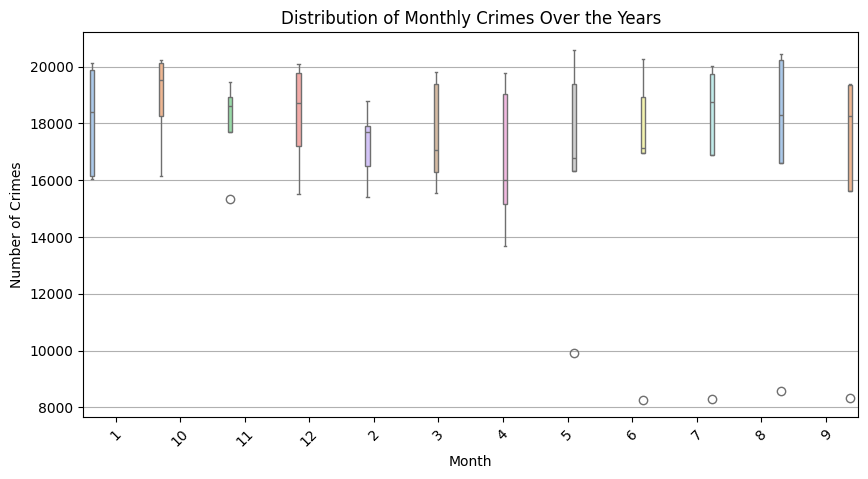

In [26]:
#Analyze and visualize seasonal patterns in crime data.
crimeData['Date Rptd'] = pd.to_datetime(crimeData['Date Rptd'], format=date_format, errors='coerce')

crimeData['year'] = crimeData['Date Rptd'].dt.year
crimeData['month'] = crimeData['Date Rptd'].dt.month.astype(str)

monthly_crimes = crimeData.groupby(['year', 'month']).size().reset_index(name='crime_count')

plt.figure(figsize=(10, 5))
sns.boxplot(x='month', y='crime_count', data=monthly_crimes, hue='month', palette='pastel', dodge=True, legend=False)
plt.title('Distribution of Monthly Crimes Over the Years')
plt.xlabel('Month')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [27]:
#Identify the most common type of crime and its trends over time.
crime_counts = crimeData['Crm Cd Desc'].value_counts()
most_common_crime = crime_counts.idxmax()
highest_frequency = crime_counts.max()
print(f"The most common crime type is '{most_common_crime}' with {highest_frequency} occurrences.")

The most common crime type is 'VEHICLE - STOLEN' with 110804 occurrences.


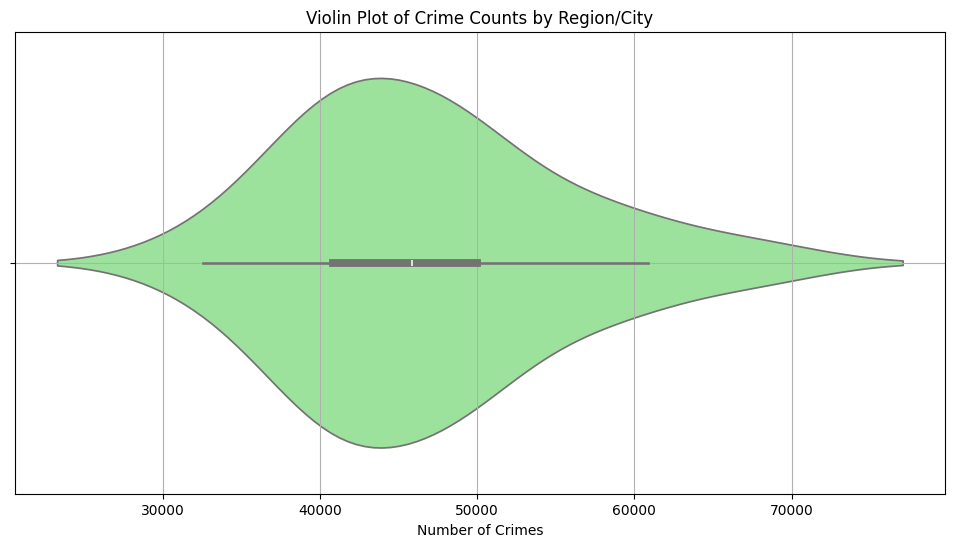

In [28]:
#nvestigate if there are any notable differences in crime rates between regions or cities.
crime_by_region = crimeData['AREA NAME'].value_counts().reset_index()
crime_by_region.columns = ['Region/City', 'Crime Count']
plt.figure(figsize=(12, 6))
sns.violinplot(data=crime_by_region, x='Crime Count', color='lightgreen')
plt.title('Violin Plot of Crime Counts by Region/City')
plt.xlabel('Number of Crimes')
plt.grid(True)
plt.show()

In [29]:
#Explore correlations between economic factors (if available) and crime rates.
crimeData.info()
print("Looking at the dataset that has been provided, Crime_Data_from_2020_to_Present.csv, it does not contain the required column. Hence, a correlation cannot be found.")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 982638 entries, 0 to 982637
Data columns (total 30 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DR_NO           982638 non-null  int64         
 1   Date Rptd       982638 non-null  datetime64[ns]
 2   DATE OCC        982638 non-null  datetime64[ns]
 3   TIME OCC        982638 non-null  int64         
 4   AREA            982638 non-null  int64         
 5   AREA NAME       982638 non-null  object        
 6   Rpt Dist No     982638 non-null  int64         
 7   Part 1-2        982638 non-null  int64         
 8   Crm Cd          982638 non-null  int64         
 9   Crm Cd Desc     982638 non-null  object        
 10  Mocodes         837376 non-null  object        
 11  Vict Age        982638 non-null  int64         
 12  Vict Sex        844193 non-null  object        
 13  Vict Descent    844182 non-null  object        
 14  Premis Cd       982624 non-null  flo

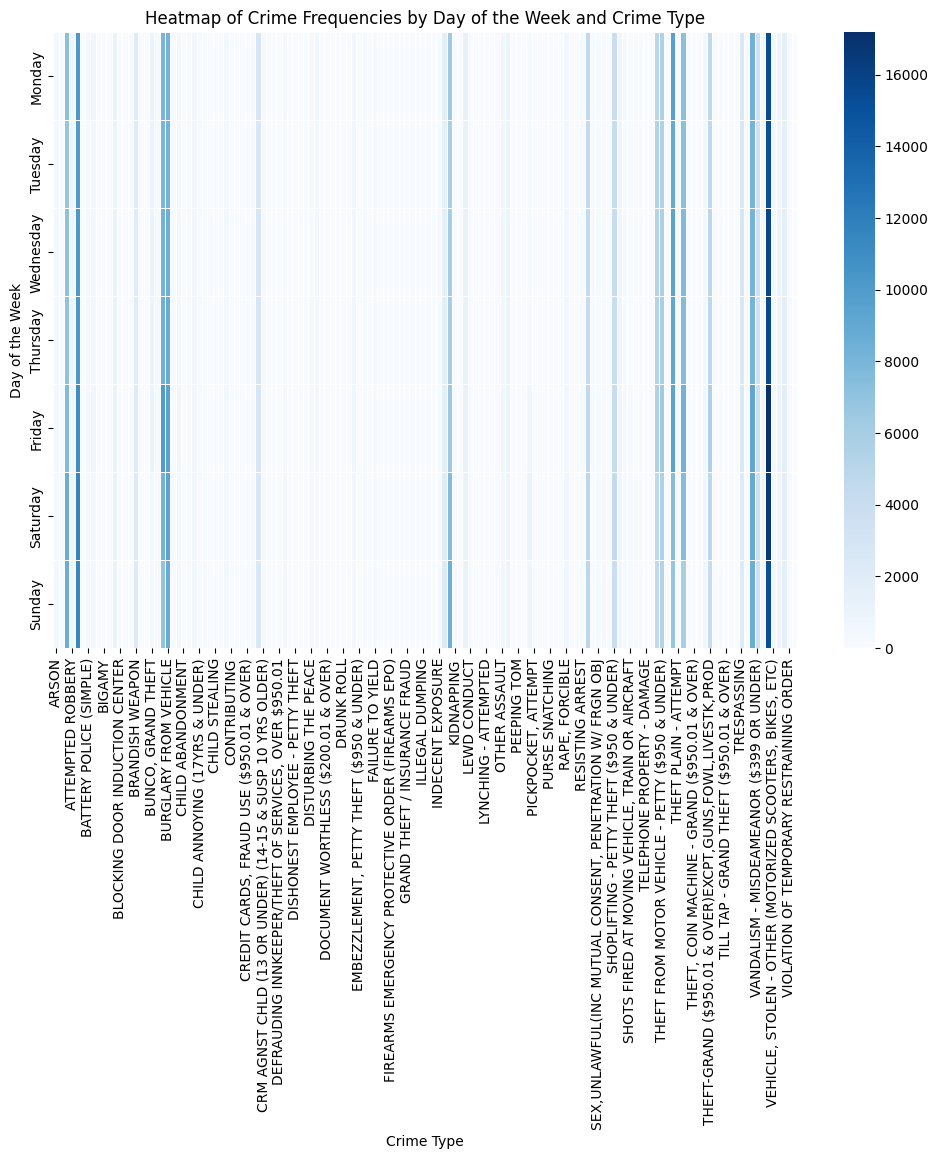

In [30]:
#Analyze the relationship between the day of the week and the frequency of certain types of crimes.
crimeData['day_of_week'] = crimeData['DATE OCC'].dt.day_name()
crime_type_by_day = crimeData.pivot_table(index='day_of_week', columns='Crm Cd Desc', aggfunc='size', fill_value=0)

crime_type_by_day = crime_type_by_day.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

plt.figure(figsize=(12, 8))
sns.heatmap(crime_type_by_day, cmap='Blues', linewidths=0.5)
plt.title('Heatmap of Crime Frequencies by Day of the Week and Crime Type')
plt.xlabel('Crime Type')
plt.ylabel('Day of the Week')
plt.xticks(rotation=90)
plt.show()

<Figure size 1000x600 with 0 Axes>

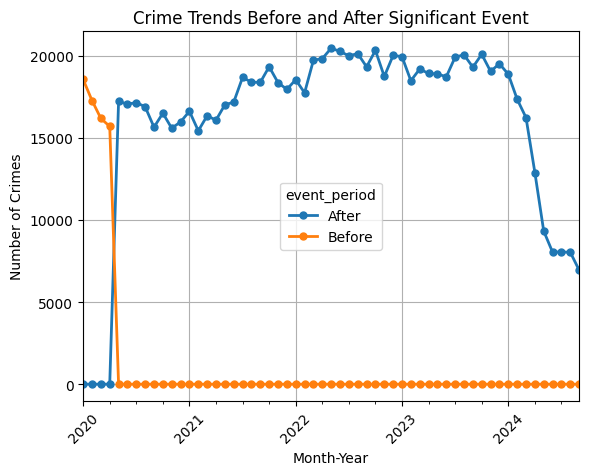

In [31]:
#Investigate any impact of significant events or policy changes on crime rates.
event_date = pd.to_datetime('2020-05-01')
crimeData['event_period'] = crimeData['DATE OCC'].apply(lambda x: 'Before' if x < event_date else 'After')
crimeData['month_year'] = crimeData['DATE OCC'].dt.to_period('M')
crime_trend = crimeData.groupby(['month_year', 'event_period']).size().unstack().fillna(0)

plt.figure(figsize=(10, 6))
crime_trend.plot(marker='o', linestyle='-', linewidth=2, markersize=5)
plt.title('Crime Trends Before and After Significant Event')
plt.xlabel('Month-Year')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

ADVANCED ANALYSIS : 

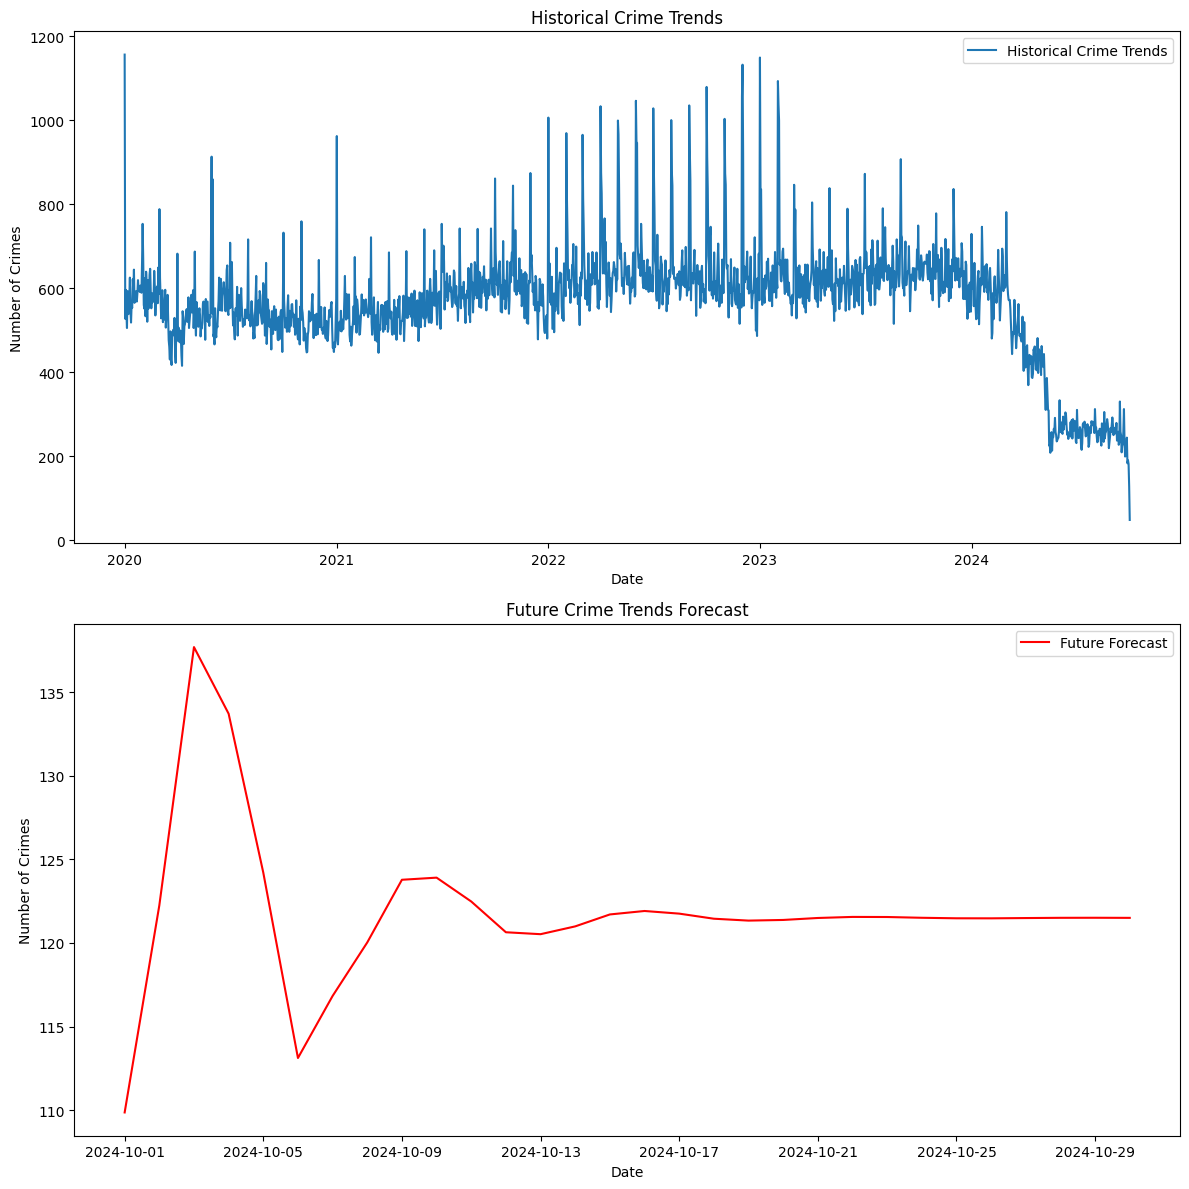

In [41]:
#Use predictive modeling techniques (e.g., time series forecasting) to predict future crime trends.
crimeData['DATE OCC'] = pd.to_datetime(crimeData['DATE OCC'])

crime_series = crimeData.resample('D', on='DATE OCC').size()

model = ARIMA(crime_series, order=(5, 1, 0))
model_fit = model.fit()

future_forecast = model_fit.forecast(steps=30)

plt.figure(figsize=(12, 12))

plt.subplot(2, 1, 1)
plt.plot(crime_series, label='Historical Crime Trends')
plt.title('Historical Crime Trends')
plt.xlabel('Date')
plt.ylabel('Number of Crimes')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(pd.date_range(start=crime_series.index.max(), periods=31)[1:], future_forecast, label='Future Forecast', color='red')
plt.title('Future Crime Trends Forecast')
plt.xlabel('Date')
plt.ylabel('Number of Crimes')
plt.legend()

plt.tight_layout()
plt.show()

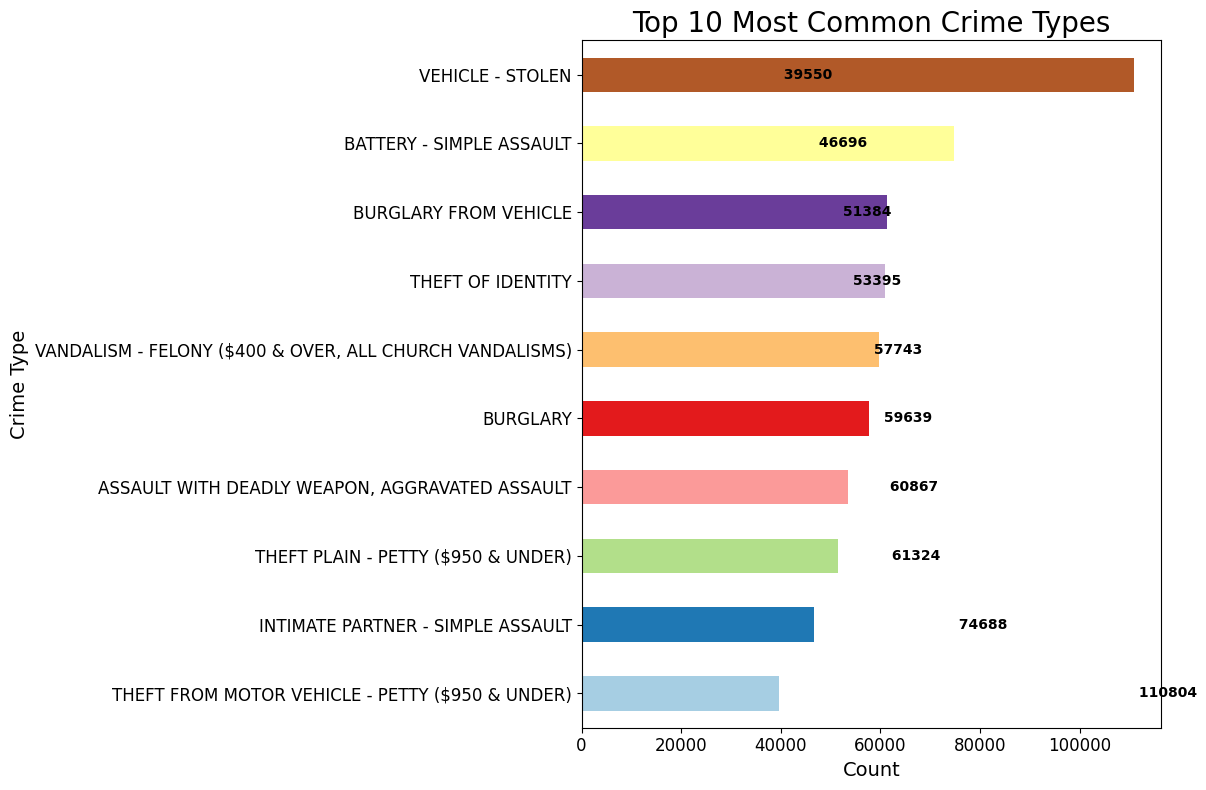

In [33]:
#Explore additional questions or hypotheses related to the dataset.

#Q1) What are the most common crime types reported?
crime_type_counts = crimeData['Crm Cd Desc'].value_counts().head(10)
plt.figure(figsize=(12, 8))
crime_type_counts.sort_values().plot(kind='barh', color=plt.cm.Paired(np.linspace(0, 1, 10)))
plt.title('Top 10 Most Common Crime Types', fontsize=20)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Crime Type', fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=12)
for i, v in enumerate(crime_type_counts):
    plt.text(v, i, f' {v}', va='center', fontweight='bold')
plt.tight_layout()
plt.show()

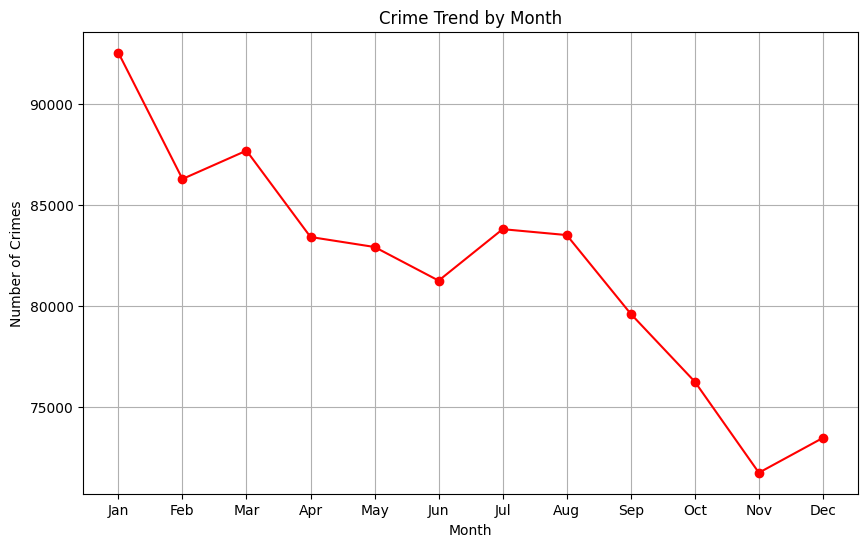

In [34]:
#Q2) Is there a seasonal trend in crime rates?
crimeData['DATE OCC'] = pd.to_datetime(crimeData['DATE OCC'], errors='coerce')

crimeData['month'] = crimeData['DATE OCC'].dt.month

crime_by_month = crimeData.groupby('month').size()

crime_by_month.plot(kind='line', marker='o', figsize=(10, 6), color='red')
plt.title('Crime Trend by Month')
plt.xlabel('Month')
plt.ylabel('Number of Crimes')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()

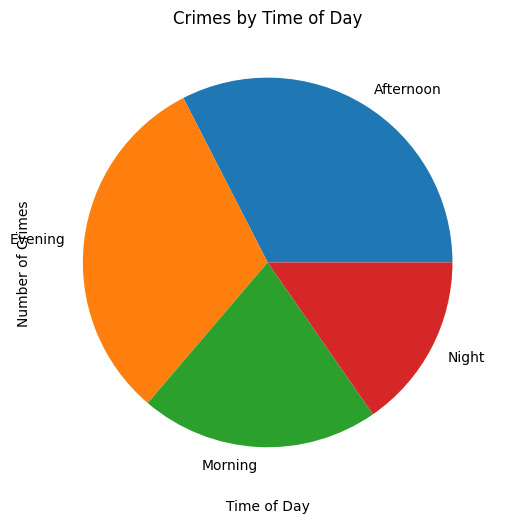

In [35]:
#Q3) Are there certain times of day when crime is more prevalent?
crimeData['Time of Day'] = pd.cut(crimeData['TIME OCC'], 
                                   bins=[0, 600, 1200, 1800, 2400], 
                                   labels=['Night', 'Morning', 'Afternoon', 'Evening'], 
                                   right=False)

time_of_day_counts = crimeData['Time of Day'].value_counts()

time_of_day_counts.plot(kind='pie', color='lightgreen', figsize=(10, 6))
plt.title('Crimes by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=0)
plt.show()

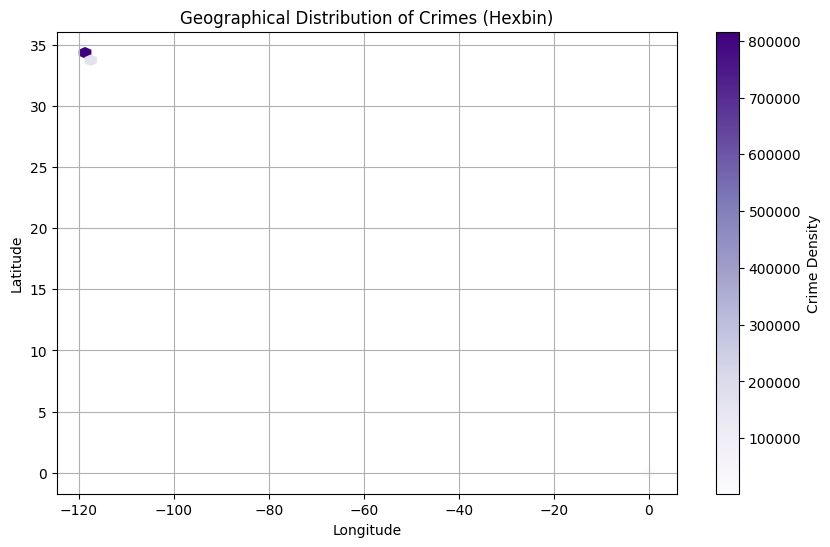

In [36]:
#Q4) Is there a correlation between crime occurrence and location (latitude and longitude)?
plt.figure(figsize=(10, 6))
plt.hexbin(crimeData['LON'], crimeData['LAT'], gridsize=50, cmap='Purples', mincnt=1)
plt.colorbar(label='Crime Density')
plt.title('Geographical Distribution of Crimes (Hexbin)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

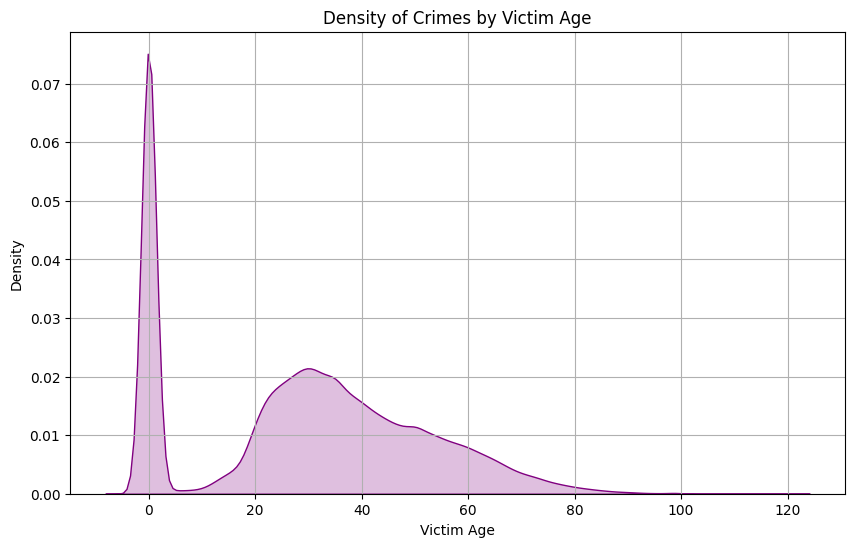

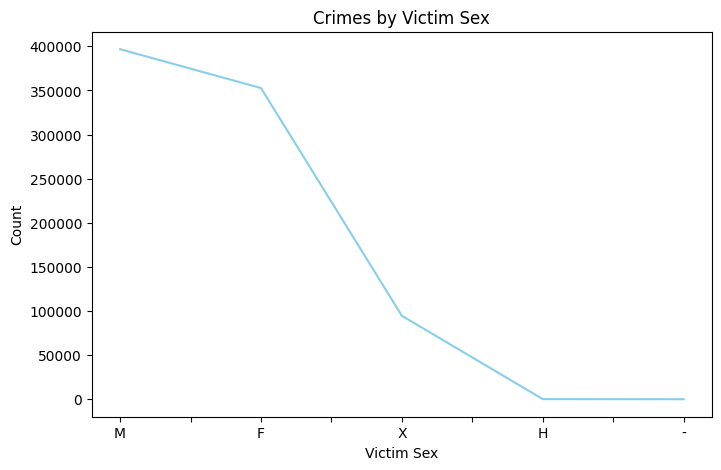

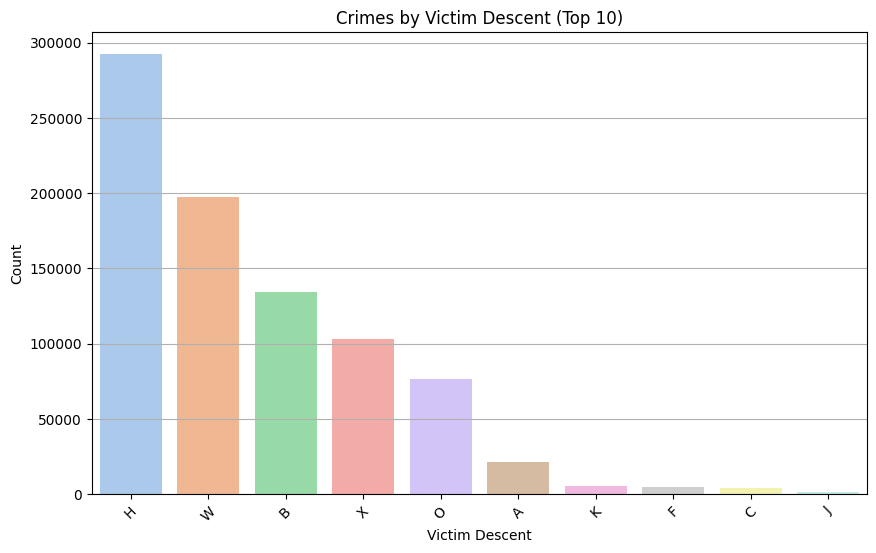

In [37]:
#Q5) Do certain victim characteristics (age, gender, descent) affect crime occurrence?
plt.figure(figsize=(10, 6))
sns.kdeplot(crimeData['Vict Age'], color='purple', fill=True) 
plt.title('Density of Crimes by Victim Age')
plt.xlabel('Victim Age')
plt.ylabel('Density')
plt.grid(True)
plt.show()

victim_sex_counts = crimeData['Vict Sex'].value_counts()

victim_sex_counts.plot(kind='line', color='skyblue', figsize=(8, 5))
plt.title('Crimes by Victim Sex')
plt.xlabel('Victim Sex')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

top_victim_descent_counts = crimeData['Vict Descent'].value_counts().head(10).reset_index()
top_victim_descent_counts.columns = ['Victim Descent', 'Count']

plt.figure(figsize=(10, 6))
sns.barplot(x='Victim Descent', y='Count', data=top_victim_descent_counts, hue='Victim Descent', dodge=False, palette='pastel', legend=False)
plt.title('Crimes by Victim Descent (Top 10)')
plt.xlabel('Victim Descent')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

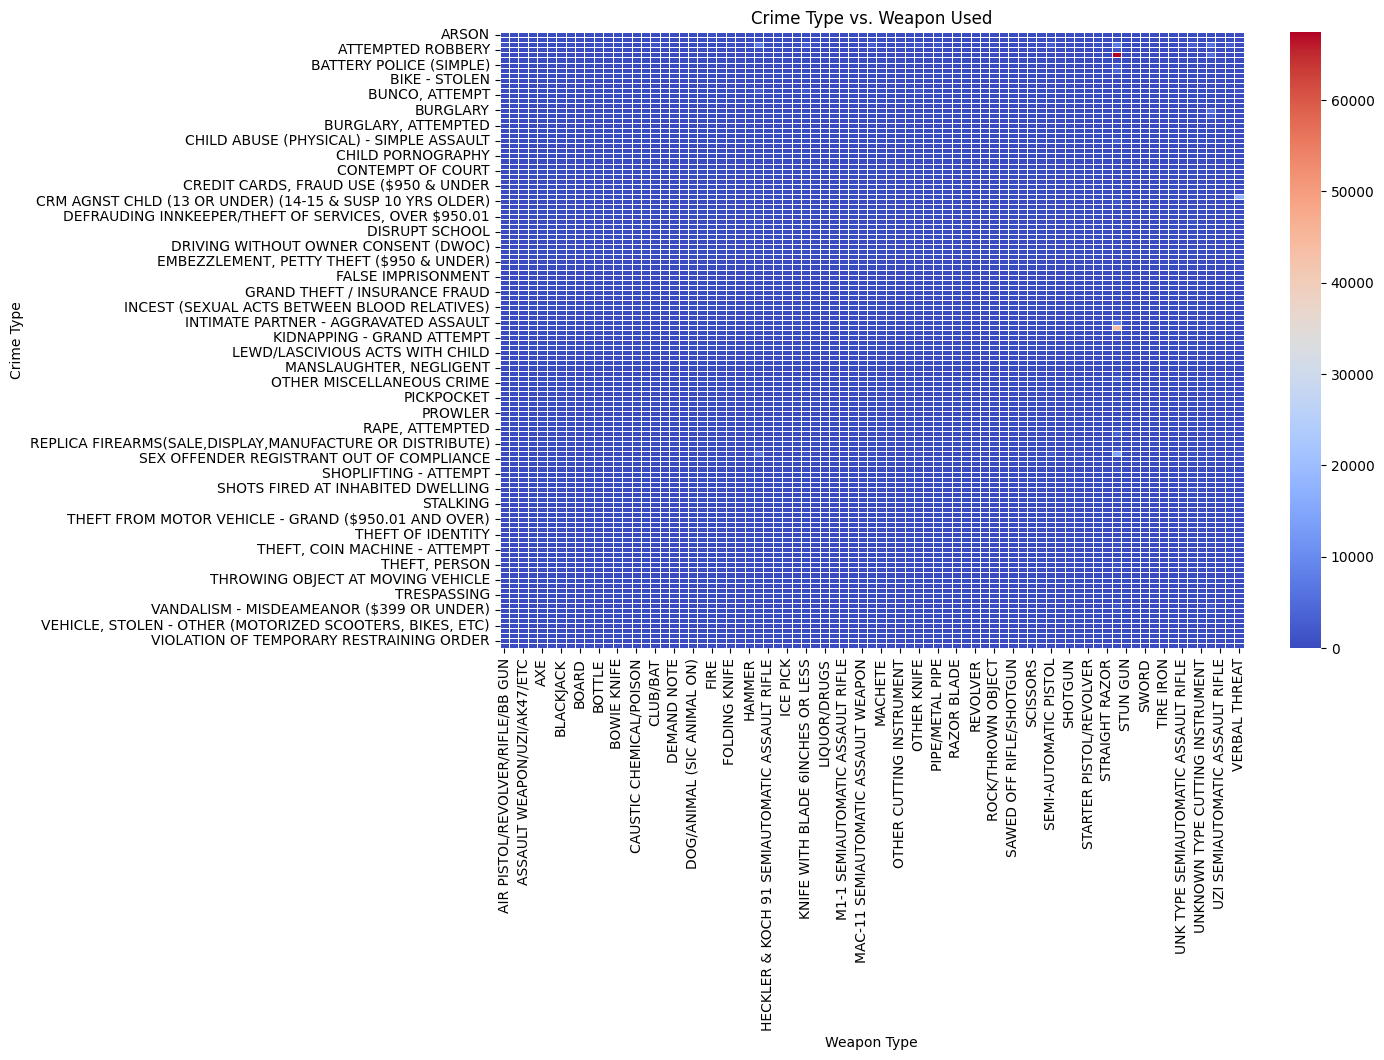

In [38]:
#Q6) What is the relationship between crime type and the type of weapon used?
crime_weapon = crimeData.groupby(['Crm Cd Desc', 'Weapon Desc']).size().unstack().fillna(0)

plt.figure(figsize=(12, 8))
sns.heatmap(crime_weapon, cmap='coolwarm', linewidths=0.5)
plt.title('Crime Type vs. Weapon Used')
plt.xlabel('Weapon Type')
plt.ylabel('Crime Type')
plt.show()

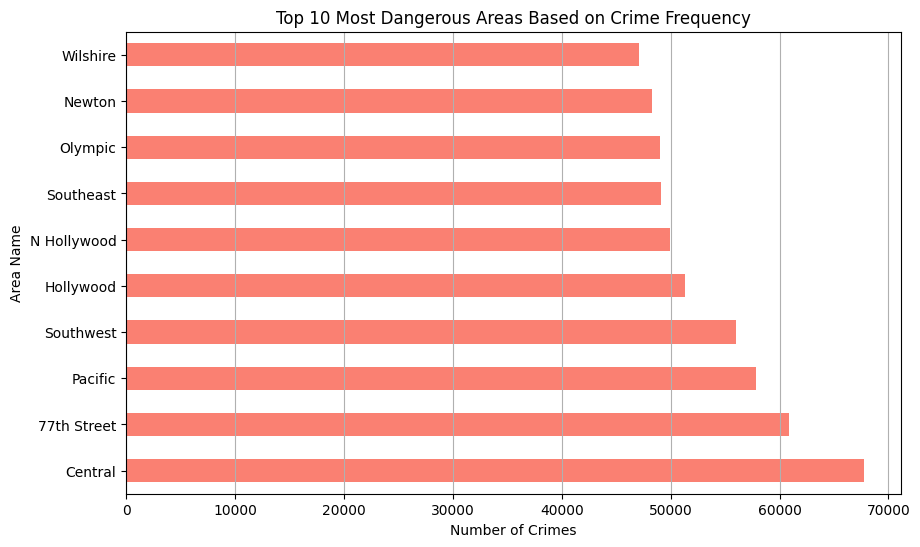

In [39]:
#Q7) What are the most dangerous areas based on the frequency of crimes?
area_crime_counts = crimeData['AREA NAME'].value_counts()

plt.figure(figsize=(10, 6))
area_crime_counts.head(10).plot(kind='barh', color='salmon')
plt.title('Top 10 Most Dangerous Areas Based on Crime Frequency')
plt.xlabel('Number of Crimes')
plt.ylabel('Area Name')
plt.grid(axis='x')
plt.show()